<a href="https://colab.research.google.com/github/KarimaHadjRabah/Python-package-test/blob/main/notebooks/workshops/LPS25/SARvey_tutorial_LPS25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p>
  <img src="https://www.uni-hannover.de/typo3conf/ext/luh_website/Resources/Public/Images/Logo/luh_logo.svg" width="128" />
  <img src="https://www.ipi.uni-hannover.de/fileadmin/site-templates/logos/ipi/ipi_logo.png" width="38" />
  <img src="https://lps25.esa.int/wp-content/themes/lps25/assets/ESA_Logo.svg" width="38" />
</p>

#### InSAR Time Series Analysis: Exploring SARvey and InSAR Explorer for Engineering Applications

##### Hands-on training @ [ESA Living Planet Symposium, June 2025, Vienna, Austria](https://lps25.esa.int/)


---

**SARvey** is an open-source tool for analyzing displacement time series from Interferometric Synthetic Aperture Radar (InSAR) data. Designed with engineering applications in mind, it enables precise monitoring of ground deformation through a streamlined processing workflow.

Learn more:  
- [SARvey GitHub](https://github.com/luhipi/sarvey)  
- [Documentation](https://sarvey.readthedocs.io/)  
- [How to cite](https://sarvey.readthedocs.io/main/readme.html#how-to-cite)

---

*Prepared by [Mahmud Haghighi](https://www.ipi.uni-hannover.de/en/haghighi/) and  [Andreas Piter](https://www.ipi.uni-hannover.de/en/piter/)   
Institute of Photogrammetry and GeoInformation,  
Leibniz University Hannover.*


### SARvey workflow

SARvey supports data preprocessed using [ISCE](https://github.com/isce-framework/isce2) and [GAMMA](https://www.gamma-rs.ch/gamma-software/gamma-software) software. The coregistered SLC stack and geometry files should be converted to SARvey's input format using [MiaplPy](https://github.com/insarlab/MiaplPy). SARvey has several components including:
- `SARvey MTI` performs the time series analysis.  
- `SARvey plot` visualizes the results.  
- `SARvey export` converts the outputs to GIS-compatible formats.

<img src="https://seafile.projekt.uni-hannover.de/f/006f702937cd4e618bcb/?dl=1" width="512">


### Before we start

This tutorial uses Jupyter Notebook syntax. Here are a few helpful things to know before running the cells:

- `!` at the beginning of a line is used to run shell (terminal) commands directly from the notebook. For example:
    - `! ls` — lists files in the current directory
    - `! pwd` — prints the current working directory
    - `! sarvey -h` — displays the help message for the sarvey command-line interface.

**Note**: You do not need the `!` if you are running these commands directly in a terminal (outside of Notebook).



## Installation

SARvey can be installed on Linux, MacOS and Windows as explained here: **[SARvey Installation](https://sarvey.readthedocs.io/main/installation.html#installation)**.

Run the following cell to install **SARvey** along with its required dependencies.  This tutorial works with SARvey tag **[tut-lps25](https://github.com/luhipi/sarvey/releases/tag/tut-lps25)**.

In [1]:
! pip install git+https://github.com/luhipi/sarvey.git@tut-lps25 --quiet

  Preparing metadata (setup.py) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 277.4/277.4 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.5/129.5 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 980.3/980.3 kB 42.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 941.4/941.4 kB 47.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.0/52.0 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.4/47.4 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 52.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.2/166.2 kB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.1/41.1 kB 3.1 MB/s et

After installation, run the following cell to verify that **SARvey** is installed correctly. If you encounter errors like `command not found` or `unknown command`, it indicates that the software is not installed properly.


In [2]:
! sarvey -h

Using default MintPy Path: /usr/local/lib/python3.11/dist-packages
Failed to import any of the following Qt binding modules: PyQt6, PySide6, PyQt5, PySide2
usage: sarvey [-h] -f FILE [-g] [-p] [-w WORKDIR] {0,1,2,3,4} {0,1,2,3,4}

Multitemporal InSAR processing workflow

Run the following steps:
0 - preparation
1 - consistency check
2 - spatial unwrapping
3 - filtering
4 - densification

positional arguments:
  {0,1,2,3,4}           Start of processing
  {0,1,2,3,4}           Stop of processing

options:
  -h, --help            show this help message and exit
  -f FILE, --filepath FILE
                        Path to the config.json file.
  -g, --generate_config
                        Write default configuration to file specified by '-f'.
  -p, --print_config_explanation
                        Prints exhaustive explanations about configuration to console.
  -w WORKDIR, --workdir WORKDIR
                        Working directory (default: current directory).

Example:
  sarvey -f conf

## Install and import other packages

Install additional packages required for this tutorial.

In [3]:
# install tree
! apt-get -qq install tree

Selecting previously unselected package tree.
(Reading database ... 126319 files and directories currently installed.)
Preparing to unpack .../tree_2.0.2-1_amd64.deb ...
Unpacking tree (2.0.2-1) ...
Setting up tree (2.0.2-1) ...
Processing triggers for man-db (2.10.2-1) ...


Imports essential Python libraries required for this tutorial.

In [4]:
import os
from IPython.display import display, Image, JSON, Markdown
from matplotlib import pyplot as plt
import numpy as np
import h5py as h5
import json5 as json

## Download data

**Background**

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/c7/Masdsched-Soleyman-Dam.JPG/1920px-Masdsched-Soleyman-Dam.JPG" width="256">

Image from: *Uni.Royal*, CC BY-SA 4.0

---

This tutorial focuses on measuring the post-construction settlement of **Masjed Soleyman Dam**. It is a rock-fill dam on the Karun river, opened in 2002. Previous investigations using GNSS and high-resolution TerraSAR-X data, have shown substantial post-construction settlement of the dam. TerraSAR-X results show that the dam undergoes a maximum deformation rate of 13 cm/year in the radar line-of-sight ([Emadali, Motagh & Haghighi, 2017](https://www.sciencedirect.com/science/article/pii/S0141029617311525)).

---

**TerraSAR-X** SpotLight interferograms in descending orbit show progressive displacement relative to the reference image on 7 March 2014. One full colour cycle corresponds to 3.1 cm of LOS motion. Red rectangle delineates deformation area related to the crest, marked with dashed black line, and its adjacent area downstream.

<img src="https://ars.els-cdn.com/content/image/1-s2.0-S0141029617311525-gr8.jpg" width="512">

---

Average 2014–2015 LOS displacement rate from TerraSAR-X SpotLight data overlaid on a Google Earth™ image.


<img src="https://ars.els-cdn.com/content/image/1-s2.0-S0141029617311525-gr10.jpg" width="512">

**Demo Dataset**: Masjed Soleyman Dam

**Dataset Highlights:**
- **Location:** Masjed Soleyman Dam, Iran
- **Sensor:** Sentinel-1
- **Number of images:** 291
- **Temporal interval:** 2015.01.05-2022.03.17
- **Data Type:** Coregistered stack of SLCs with corresponding geometry information

---

Specify the working directory.
On **Google Colab**, the working directory should be
<prep>
``` python
work_dir = '/content'
```
</prep>

In [5]:
# specify working directory. On Google Colab it should be '/content'
work_dir = '/content'

Run the following cell to downloat the data and unzip it.

In [6]:
# Change the directory
os.chdir(work_dir)

# Download data
! wget  -N https://seafile.cloud.uni-hannover.de/f/6bf916a2fba6404ab439/?dl=1  -O Masjed_Soleyman_Dam_S1_dsc_2015_2022.zip

# Unzip data into masjed_s1 directory
! unzip -q -o Masjed_Soleyman_Dam_S1_dsc_2015_2022.zip

# Rename the extracted folder
! mv Masjed_Soleyman_Dam_S1_dsc_2015_2022 masjed_s1

# Define the project directory path as a variable
project_dir=os.path.join(work_dir, 'masjed_s1')


for details.

--2025-06-22 15:12:16--  https://seafile.cloud.uni-hannover.de/f/6bf916a2fba6404ab439/?dl=1
Resolving seafile.cloud.uni-hannover.de (seafile.cloud.uni-hannover.de)... 130.75.6.85
Connecting to seafile.cloud.uni-hannover.de (seafile.cloud.uni-hannover.de)|130.75.6.85|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://seafile.cloud.uni-hannover.de/seafhttp/files/c573a8e7-1484-46d2-8db0-621b20b990ab/Masjed_Soleyman_Dam_S1_dsc_2015_2022.zip [following]
--2025-06-22 15:12:17--  https://seafile.cloud.uni-hannover.de/seafhttp/files/c573a8e7-1484-46d2-8db0-621b20b990ab/Masjed_Soleyman_Dam_S1_dsc_2015_2022.zip
Reusing existing connection to seafile.cloud.uni-hannover.de:443.
HTTP request sent, awaiting response... 200 OK
Length: 105234423 (100M) [application/zip]
Saving to: ‘Masjed_Soleyman_Dam_S1_dsc_2015_2022.zip’

Masjed_Soleyman_Dam 100%[===================>] 100.36M  21.6MB/s    in 5.7s    

2025-06-22 15:12:23 (17.5 MB/s) - ‘Masjed_Soleyma

## Check the input data

A typical directory structure to run SARvey looks like the following:
```
📂 project_folder/
  │── 📁 inputs/               # SARvey inputs
  │     ├── slcStack.h5        # stack of resampled SLCs
  │     └── geometryRadar.h5   # geometry in Radar coordinates
  ├── 📁 outputs/              # SARvey outputs
  └── 📄 config.json           # SARvey processing configuration
```

The input to SARvey are the `slcStack.h5` and `geometryRadar.h5`.


Let's check the directory structure of the downloaded data using `tree` command. You can also browse the files in the `Files` section (left panel).

In [7]:
# Navigate to the project directory
os.chdir(project_dir)

# Display the directory structure in a tree-like format
! tree


.
└── inputs
    ├── geometryRadar.h5
    └── slcStack.h5

1 directory, 2 files


***
It is a good practice to use MintPy `info.py` functions to verify the metadata of the input files before starting the SARvey processing.

In [8]:
## Navigate to the input directory
os.chdir(project_dir+'/inputs')

# Display metadata and structure of the 'slcStack.h5' file
! info.py slcStack.h5


******************** Basic File Info ************************
file name: /content/masjed_s1/inputs/slcStack.h5
file type: timeseries
coordinates : RADAR

******************** Date Stat Info *************************
Start Date: 20150105
End   Date: 20220317
Number of dates  : 291
STD of datetimes : 1.74 years

******************** HDF5 File Structure ********************
Attributes in / level:
  ALOOKS                           1
  ANTENNA_SIDE                     -1
  AZIMUTH_PIXEL_SIZE               13.976948
  CENTER_LINE_UTC                  9953.403610
  DATE                             20190619
  EARTH_RADIUS                     6372258.8992
  FILE_LENGTH                      100
  FILE_PATH                        /data/share/haghighi/projects/dams_Iran/miaplpy/rslc/20190619/20190619.slc
  FILE_TYPE                        timeseries
  HEADING                          192.8505326
  HEIGHT                           699531.4304
  LAT_REF1                         32.03227791
  LAT_RE

There are more information that you can get using `info.py`. For example, you can run the following to get a list of image dates in the slcStack.h5 file.

<prep>
``` sh
info.py slcStack.h5 --num
```
</prep>

In [ ]:
! info.py slcStack.h5 --num

***
You can also use MintPy `view.py` functions to visualize the input fles before starting the SARvey processing.

view.py geometryRadar.h5 --save --noverbose --update
Figure(1650x800)


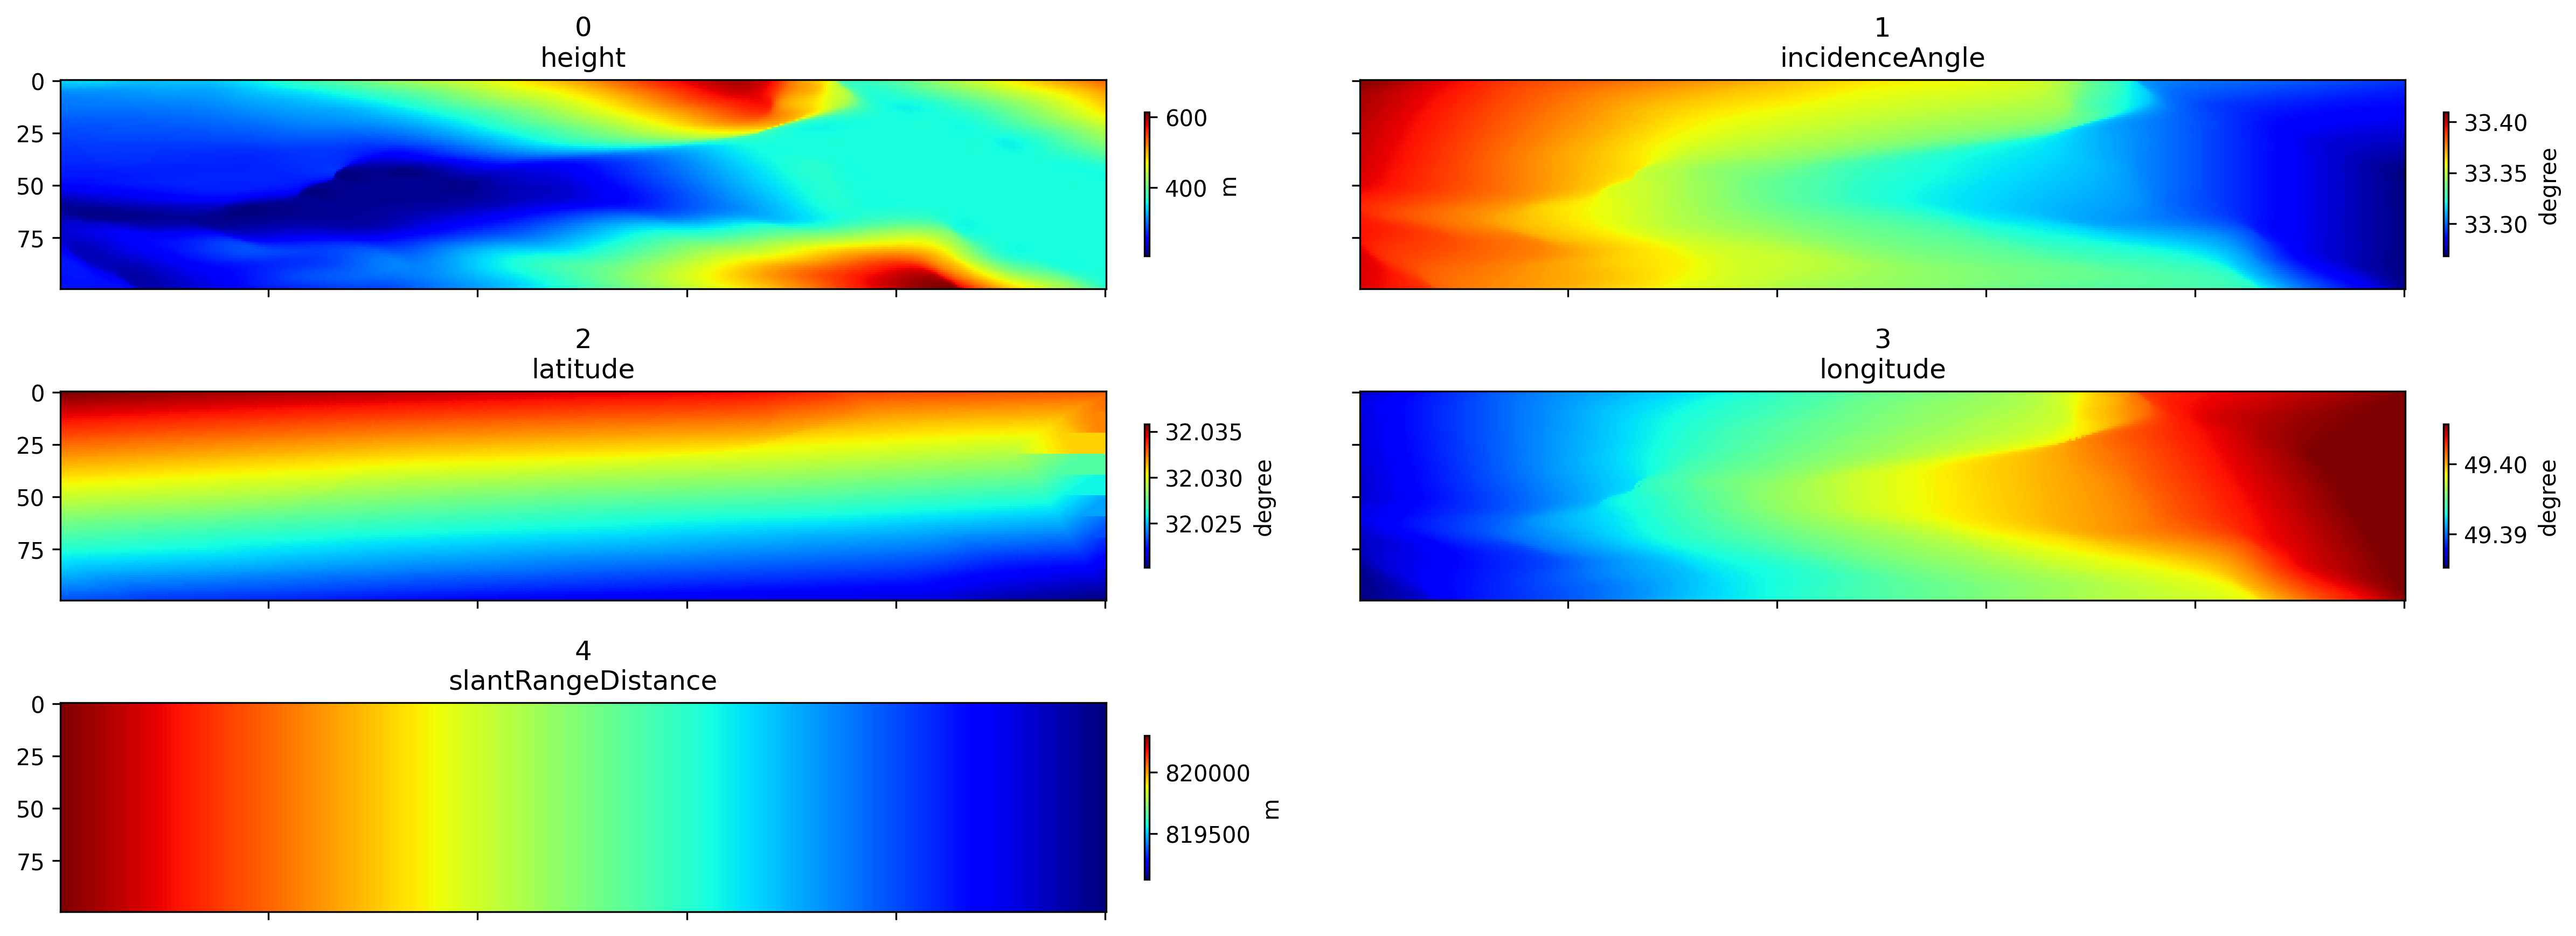

In [9]:
## Navigate to the input directory
os.chdir(project_dir+'/inputs')

# Use the view.py command to create geometryRadar.png
! view.py geometryRadar.h5 --save --noverbose --update

# Show the image in notebook
Image(filename='geometryRadar.png')

`view.py` can also be used to show the amplitudes from the slcStack, but it might be time-consuming, depending on the data size

***
Both input files are in HDF5 format and can be examined using a simple script with the `h5py` library. First, we define `showMeanAmplitude()` function to extract mean amplitude of first 25 images in slcStack.h5 and then call the function.

In [10]:
def showMeanAmplitude(slc_file='inputs/slcStack.h5', n=25):
    # Open the HDF5 file containing the SLC stack
    with h5.File(slc_file, 'r') as f:
        if n>=f['slc'].shape[0]:
            print(f'Image index {n} exceeds the number of available images.')
            return
        # Extract the image 0 to n from the stack
        slc_stack = f['slc'][0:n,:,:]

    # Compute mean amplitude of the complex SLC image
    slc_amp = np.mean(np.abs(slc_stack), axis=0)

    plt.figure(figsize=(20,3))
    plt.imshow(np.log10(slc_amp), cmap='gray')
    plt.xlabel('[Range]')
    plt.ylabel('[Azimuth]')
    plt.title(f'Mean Amplitude of image 0-{n} in dB')
    plt.colorbar()
    plt.show()


/tmp/ipython-input-10-1836345779.py:14: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(slc_amp), cmap='gray')


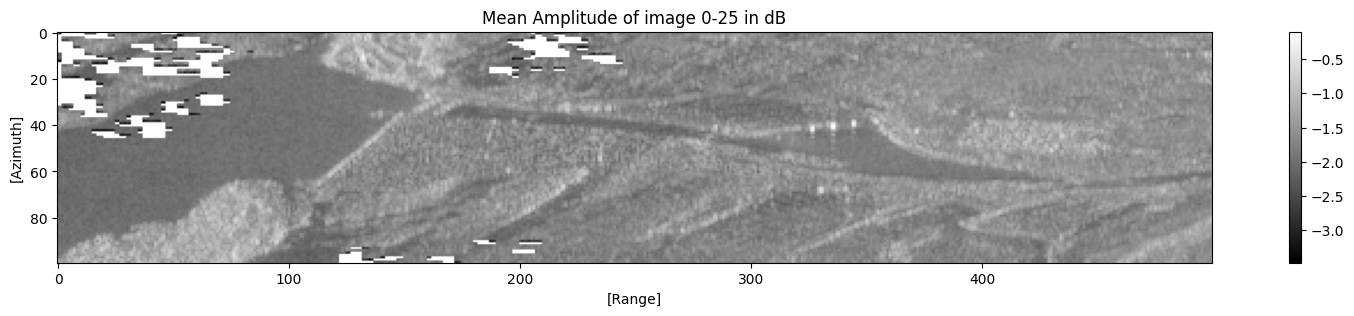

In [11]:
os.chdir(project_dir)

showMeanAmplitude()

## SARvey processing

We first run `sarvey -h` to see the quick help. Please also refer to the full documentation to see the details of processing. Run the following command to see the quick help:

`! sarvey -h`

#### Generate config file

The first step in the processing workflow is to generate the configuration file using the command:

<prep>
``` sh
    sarvey -f config.json 0 0 -g
```
</prep>

The **`-g`** flag instructs SARvey to generate a default config.json file. Although the command includes **`0 0`** as step indices, no processing steps will actually be executed when **`-g`** is used. Instead, the command will only create the configuration file.


In [12]:
os.chdir(project_dir)

! sarvey -f config.json 0 0 -g

Using default MintPy Path: /usr/local/lib/python3.11/dist-packages
Failed to import any of the following Qt binding modules: PyQt6, PySide6, PyQt5, PySide2
2025-06-22 15:15:51,764 - INFO - Write default config to file: config.json.


List the directory contents to confirm that **config.json** was successfully created.

In [13]:
! tree

.
├── config.json
└── inputs
    ├── geometryRadar.h5
    ├── geometryRadar.png
    └── slcStack.h5

1 directory, 4 files


We can open the **config.json** file in a text editor to adjust the processing parameters before starting the SARvey workflow. Alternatively, we can read and modify the file programmatically using Python.


***
we define `loadJsonConfig()` and `dumpToJsonConfig()` functions to read and modify the config file.

In [14]:
def loadJsonConfig(config_file):
    # Load the contents of config_file into a Python dictionary
    with open('config.json', 'r') as f:
        config_dict = json.load(f)
    return config_dict

def dumpToJsonConfig(config_file, config_dict):
    # Write the config_dict to config_file
    with open(config_file, 'w') as f:
        json.dump(config_dict, f, indent=4)


In [15]:
os.chdir(project_dir)

# Load the configs
config = loadJsonConfig('config.json')

# Display the configs
config


{'consistency_check': {'coherence_p1': 0.9,
  'grid_size': 200,
  'mask_p1_file': '',
  'num_nearest_neighbours': 30,
  'max_arc_length': None,
  'velocity_bound': 0.1,
  'dem_error_bound': 100.0,
  'num_optimization_samples': 100,
  'arc_unwrapping_coherence': 0.6,
  'min_num_arc': 3},
 'densification': {'num_connections_to_p1': 5,
  'max_distance_to_p1': 2000,
  'velocity_bound': 0.15,
  'dem_error_bound': 100.0,
  'num_optimization_samples': 100,
  'arc_unwrapping_coherence': 0.5},
 'filtering': {'coherence_p2': 0.8,
  'apply_aps_filtering': True,
  'interpolation_method': 'kriging',
  'grid_size': 1000,
  'mask_p2_file': '',
  'use_moving_points': True,
  'max_temporal_autocorrelation': 0.3},
 'general': {'input_path': 'inputs/',
  'output_path': 'outputs/',
  'num_cores': 50,
  'num_patches': 1,
  'apply_temporal_unwrapping': True,
  'spatial_unwrapping_method': 'puma',
  'logging_level': 'INFO',
  'logfile_path': 'logfiles/'},
 'phase_linking': {'use_phase_linking_results': False

The config file has several sections.

- **`general`**

  This section includes top-level parameters such as the number of cores and the paths to the input and output data.

- **`phase_linking`**

  This section specifies the Phase Linking parameters. By default, `use_phase_linking_results: false`, i.e, no phase linking is performed.

- **`preparation`**

  This section includes network parameters and type, and window size used to estimate the temporal coherence.

- **`consistency_check`**

  This section contains parameters related to the first order points.

- **`unwrapping`**

  This section will specify parameters related to the unwrapping process.

- **`filtering`**

  This section defines the parameters for atmospheric estimation and filtering.

- **`densification`**

  This section includes the settings for second order points.


Please refer to the [documentation](https://sarvey.readthedocs.io/main/processing.html#configuration-file) for the details of each parameter.

**SARvey** supports two general modes of processing, depending on the characteristics of the displacement (spatial extent, magnitude, temporal behaviour, etc.):
- two-step unwrapping workflow
- one-step unwrapping workflow


We will modify the following parameters before starting the processing:

- general
    - output_path: 'output_sb'
    - num_cores: 10

You can modify the parameters using a text editor, or run the following cell to modify the `config.json` file.

In [16]:
os.chdir(project_dir)

# Load the configs
config = loadJsonConfig('config.json')

# Modify parameter
config['general']['output_path'] = 'output_sb'
config['general']['num_cores'] = 10

dumpToJsonConfig('config.json', config)

Now verify the modified config file **`json.config`**

In [17]:
os.chdir(project_dir)

# Load the configs
config = loadJsonConfig('config.json')
config


{'consistency_check': {'coherence_p1': 0.9,
  'grid_size': 200,
  'mask_p1_file': '',
  'num_nearest_neighbours': 30,
  'max_arc_length': None,
  'velocity_bound': 0.1,
  'dem_error_bound': 100.0,
  'num_optimization_samples': 100,
  'arc_unwrapping_coherence': 0.6,
  'min_num_arc': 3},
 'densification': {'num_connections_to_p1': 5,
  'max_distance_to_p1': 2000,
  'velocity_bound': 0.15,
  'dem_error_bound': 100.0,
  'num_optimization_samples': 100,
  'arc_unwrapping_coherence': 0.5},
 'filtering': {'coherence_p2': 0.8,
  'apply_aps_filtering': True,
  'interpolation_method': 'kriging',
  'grid_size': 1000,
  'mask_p2_file': '',
  'use_moving_points': True,
  'max_temporal_autocorrelation': 0.3},
 'general': {'input_path': 'inputs/',
  'output_path': 'output_sb',
  'num_cores': 10,
  'num_patches': 1,
  'apply_temporal_unwrapping': True,
  'spatial_unwrapping_method': 'puma',
  'logging_level': 'INFO',
  'logfile_path': 'logfiles/'},
 'phase_linking': {'use_phase_linking_results': Fals

#### Step 0: Preparation

Run [**Step 0: Preparation**](https://sarvey.readthedocs.io/main/processing.html#step-0-preparation) including the following:

- Loading the data from the inputs/slcStack.h5
- Designing the interferogram network based on the temporal and perpendicular baselines.
- Generating a stack of interferograms
- Estimating the temporal coherence


Currently 5 different networks of interfegograms are supported by SARvey including:

- small baseline network (`sb`) (Berardino et al. 2002),
- star network (`star`, single-reference network) (Ferretti et al. 2001)


<img src="https://raw.githubusercontent.com/luhipi/sarvey-tutorials/main/notebooks/SARvey_tutorial_01/pics/networks_star_sb.svg" width="512">


In [18]:
os.chdir(project_dir)

! sarvey -f config.json 0 0

Using default MintPy Path: /usr/local/lib/python3.11/dist-packages
Failed to import any of the following Qt binding modules: PyQt6, PySide6, PyQt5, PySide2
2025-06-22 15:20:22,486 - INFO - SARvey version: 1.2.0 - Strawberry Pie, 2025-02-19_01, Run: MTInSAR
                                .            _____         _____
                      +------  / \  ------  / ____|  /\   |  __ \
                      |       /  /         | (___   /  \  | |__) |_   _____ _   _
                      |      /  /           \___ \ / /\ \ |  _  /\ \ / / _ \ | | |
                      |   /\\  /  /         ____) / ____ \| | \ \ \ V /  __/ |_| |
                      |  /  \\/  /         |_____/_/    \_\_|  \_\ \_/ \___|\__, |
                      | /    \  /                                            __/ |
                      | \    / /               v1.2.0 - Strawberry Pie      |___/
                        \\  / /...             2025-02-19_01                     |
                       / \\/ /   

Typical output of this step are
- background_map.h5
- ifg_stack.h5
- coordinates_utm.h5
- ifg_network.h5
- temporal_coherence.h5

Also, some snapshots are created in `pic` directory.

We can now check the list output files with `tree`

In [19]:
! tree

.
├── config.json
├── inputs
│   ├── geometryRadar.h5
│   ├── geometryRadar.png
│   └── slcStack.h5
├── logfiles
│   └── sarvey_2025-06-22-15-20-22.log
└── output_sb
    ├── background_map.h5
    ├── config.json
    ├── coordinates_utm.h5
    ├── ifg_network.h5
    ├── ifg_stack.h5
    ├── pic
    │   ├── step_0_amplitude_image.png
    │   ├── step_0_interferogram_network.png
    │   └── step_0_temporal_phase_coherence.png
    └── temporal_coherence.h5

4 directories, 14 files


Now you can check the files created in pic directory.

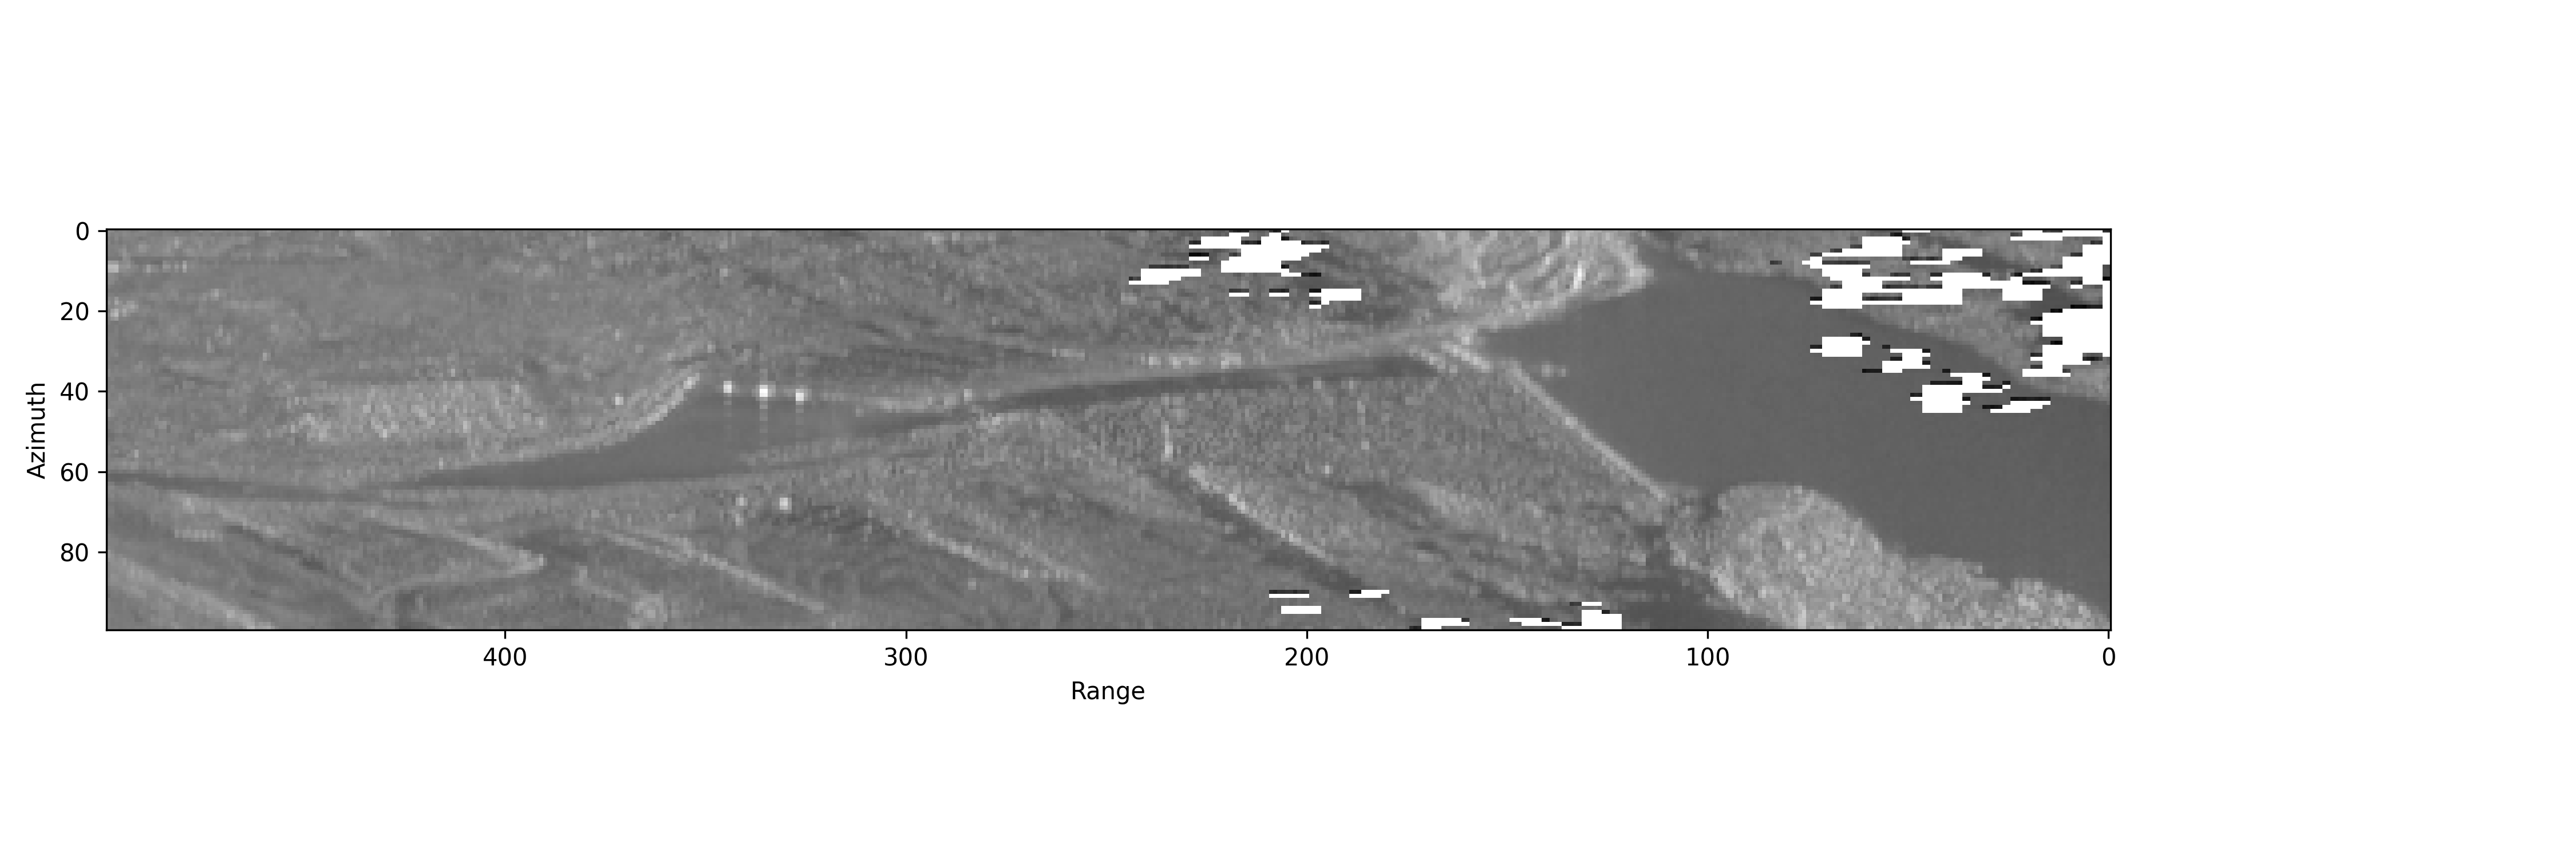

In [20]:
# Display Mean Amplitude image
Image(filename='output_sb/pic/step_0_amplitude_image.png')


**Note**: note that the amplitude image is flipped.

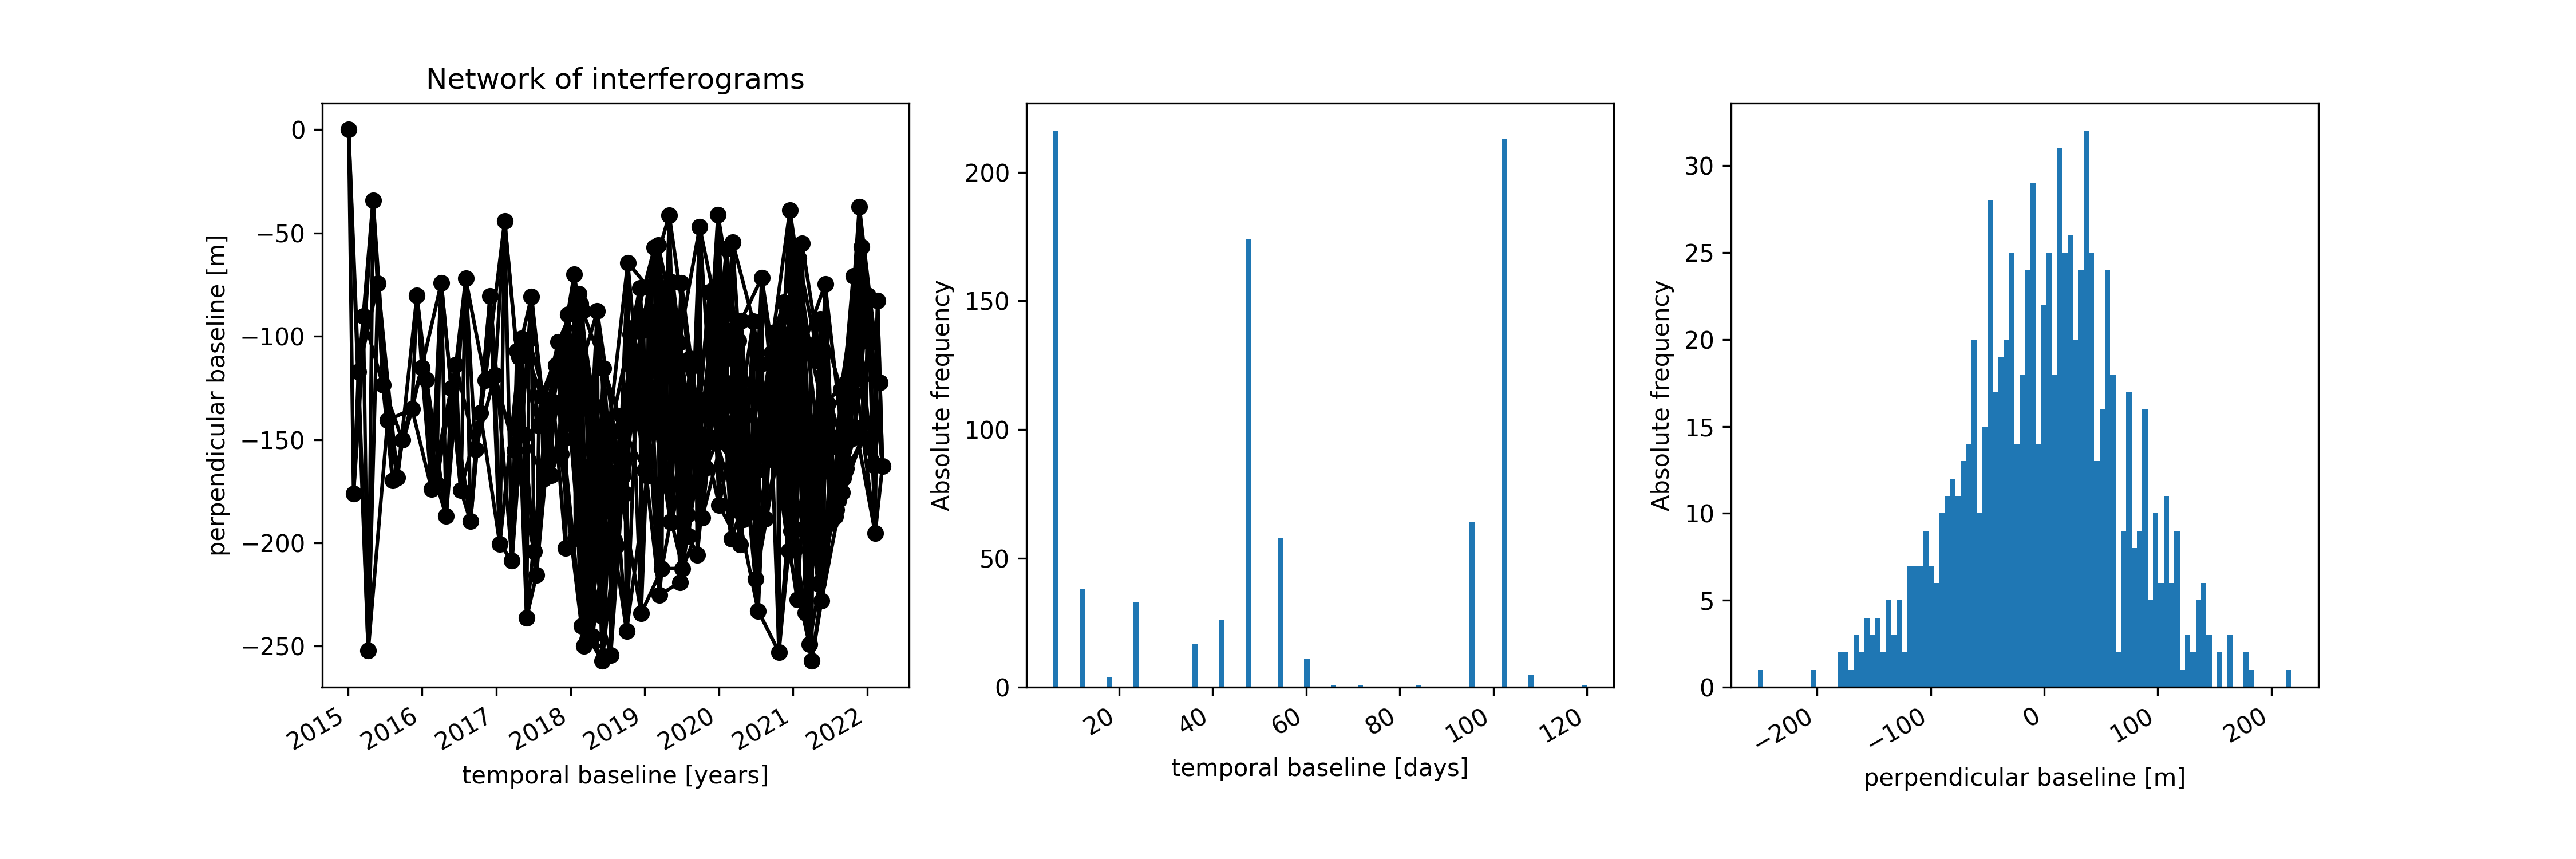

In [21]:
# Display Interferogram Network
Image(filename='output_sb/pic/step_0_interferogram_network.png')


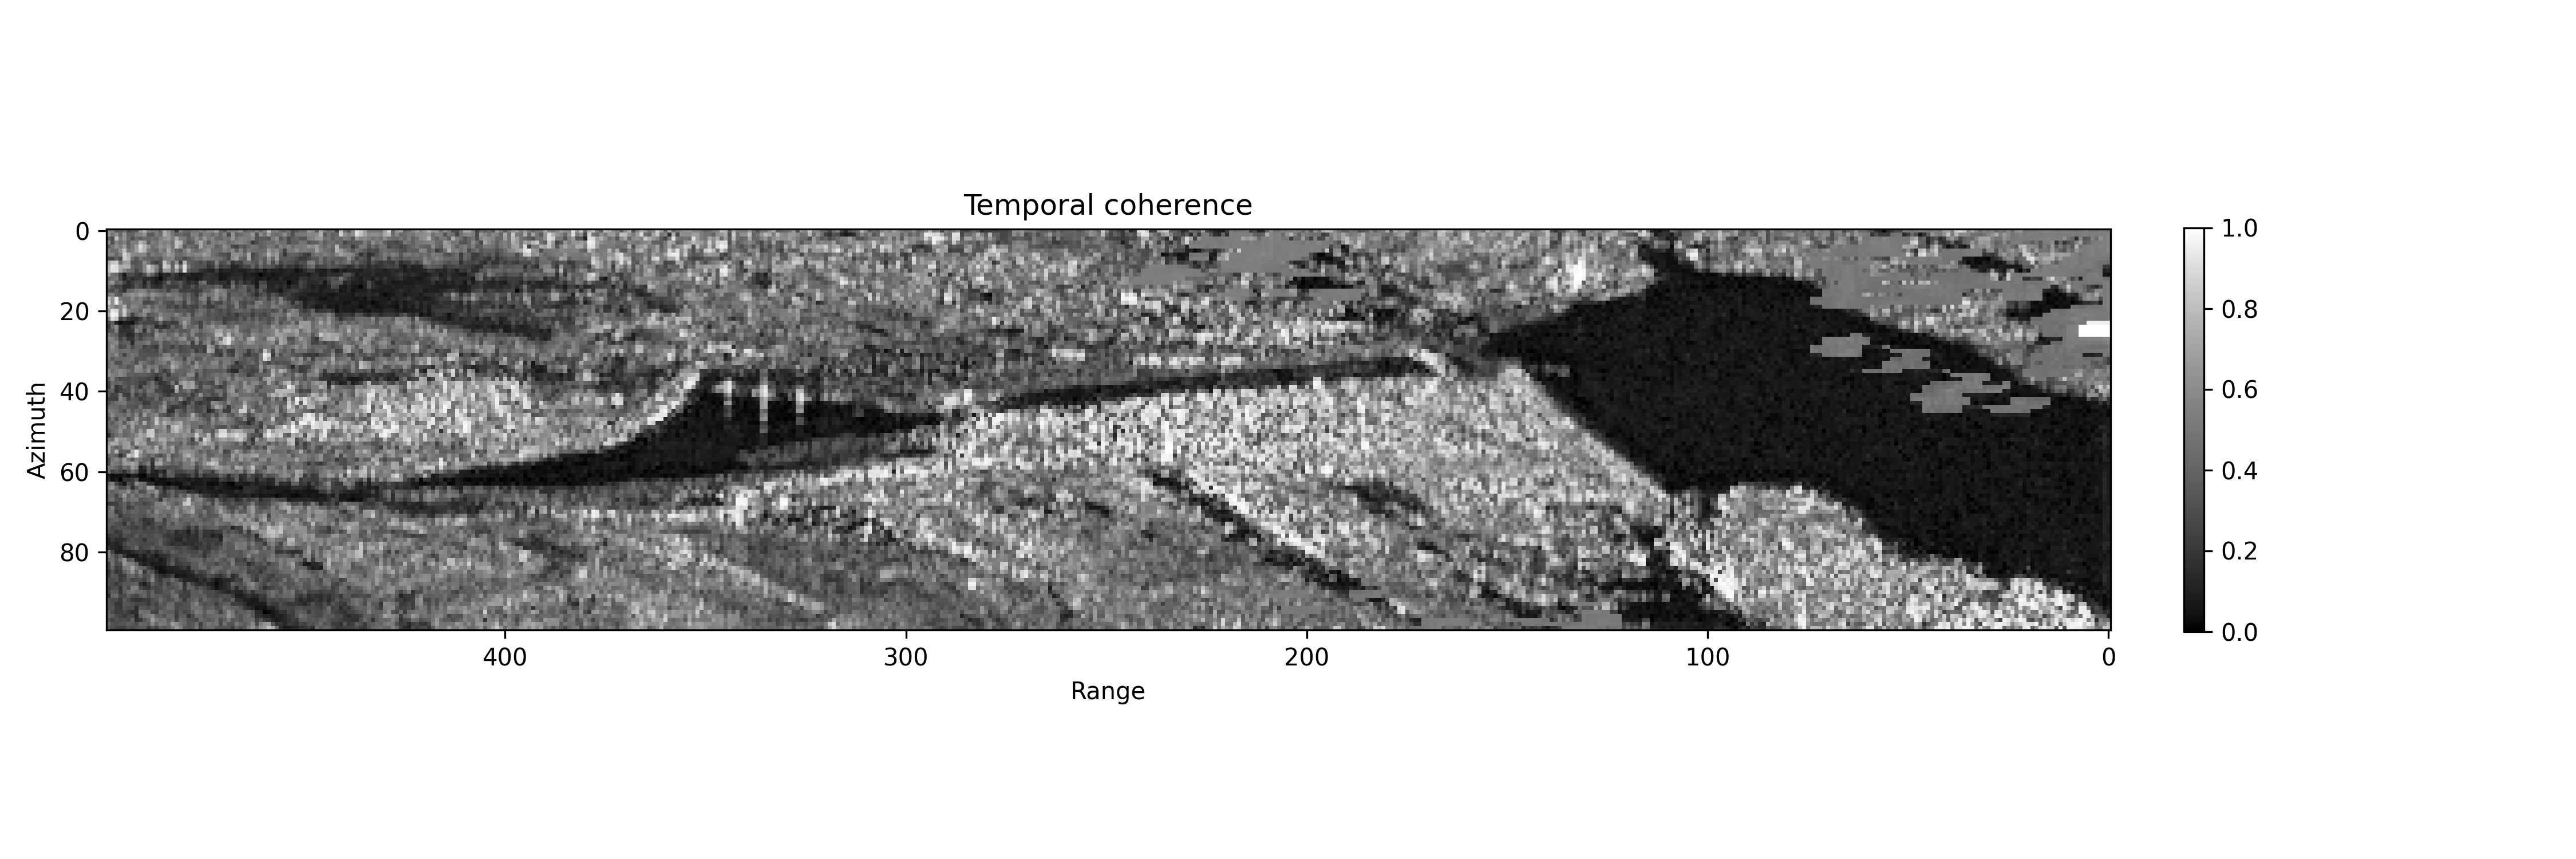

In [22]:
# Display Temporal Phase Coherence
Image(filename='output_sb/pic/step_0_temporal_phase_coherence.png')


Pixel selection is one of the major steps of InSAR time series analysis. To identify pixels that preserve phase quality, **Temporal Phase Coherence (TPC)** as proposed by [Zhao, et al., 2019](https://ieeexplore.ieee.org/document/8764576) is estimated in **step 0**. First, we estimate the phase noise for each pixel $p$ in each interferogram $i$ in the stack of $M$ interferograms.

\begin{equation}
    \psi_{\text{noise}}^{i,p} \approx \psi_{\text{central}}^{i,p} - \widetilde{\psi}_{\text{neigh}}^{i,p}
\end{equation}

<img src="https://raw.githubusercontent.com/luhipi/sarvey-tutorials/main/notebooks/SARvey_tutorial_01/pics/temporal_phase_coherence.svg" width="256">


Then, we calculate temporal phase coherence from the phase noise.

\begin{equation}
    \widehat{\gamma}{^{\,p}_{} = \frac{1}{M} \cdot \big| \sum_{i=1}^{M} e^{j \psi_{\text{noise}}^{i,p}}} \big|
\end{equation}


We will use temporal phase coherence to select first-order and second-order points.


#### Step 1: Consistency Check

Run [**Step 1: Consistency Check**](https://sarvey.readthedocs.io/main/processing.html#step-1-consistency-check) including the following:

- Selecting candidates for first order points
- Creating a spatial network
- Temporal unwrapping
- Performing a consistency check on the data


First check the parameters step 1 in the config file.

In [23]:
os.chdir(project_dir)

# Load the configs
config = loadJsonConfig('config.json')
config['consistency_check']


{'coherence_p1': 0.9,
 'grid_size': 200,
 'mask_p1_file': '',
 'num_nearest_neighbours': 30,
 'max_arc_length': None,
 'velocity_bound': 0.1,
 'dem_error_bound': 100.0,
 'num_optimization_samples': 100,
 'arc_unwrapping_coherence': 0.6,
 'min_num_arc': 3}

We do not change any parameters and run step 1.

In [24]:
os.chdir(project_dir)

! sarvey -f config.json 1 1

Using default MintPy Path: /usr/local/lib/python3.11/dist-packages
Failed to import any of the following Qt binding modules: PyQt6, PySide6, PyQt5, PySide2
2025-06-22 15:25:35,503 - INFO - SARvey version: 1.2.0 - Strawberry Pie, 2025-02-19_01, Run: MTInSAR
                                .            _____         _____
                      +------  / \  ------  / ____|  /\   |  __ \
                      |       /  /         | (___   /  \  | |__) |_   _____ _   _
                      |      /  /           \___ \ / /\ \ |  _  /\ \ / / _ \ | | |
                      |   /\\  /  /         ____) / ____ \| | \ \ \ V /  __/ |_| |
                      |  /  \\/  /         |_____/_/    \_\_|  \_\ \_/ \___|\__, |
                      | /    \  /                                            __/ |
                      | \    / /               v1.2.0 - Strawberry Pie      |___/
                        \\  / /...             2025-02-19_01                     |
                       / \\/ /   

Typical output of this step are
- point_network.h5
- point_network_parameter.h5
- p1_ifg_wr.h5

Also, some snapshots are created in `pic` directory.

We can now check the list output files with `! tree` in the following cell.

Then you can visualize the selected first order points by running:
<prep>
``` python
Image(filename='output_sb/pic/selected_pixels_temp_coh_0.9.png')
```
</prep>

Candidates for first-order points are selected based on a threshold for temporal phase coherence.

<img src="https://raw.githubusercontent.com/luhipi/sarvey-tutorials/main/notebooks/SARvey_tutorial_01/pics/p1_selection.svg" width="384">

A network is then constructed to connect these first-order points, with the connections between points referred to as arcs. For each arc $pq$, we have $M$ double-difference phase observations $\psi^{i,pq}$. We estimate the velocity difference, $v^{pq}$, and topography error difference, $h^{pq}$, that maximize the temporal phase coherence of the arc $\widehat{\gamma}^{pq}$.

\begin{equation}
\mathrm{argmax}_{v^{l}, h^{pq}}\,\widehat{\gamma}^{pq}=\frac{1}{M}\cdot\left|\sum_{i=1}^{M}e^{j\cdot\psi_{\text{res}}^{i,pq}\left(v^{pq},h^{pq}\right)}\right|
\end{equation}


<img src="https://raw.githubusercontent.com/luhipi/sarvey-tutorials/main/notebooks/SARvey_tutorial_01/pics/arc_phase_solution.svg" width="384">

You can display the outputs using the following commands:

Display arcs:

<prep>
``` python
Image(filename='output_sb/pic/step_1_arc_coherence.png')
```
</prep>

Display Arcs after removing inconsistent arcs/points:

<prep>
``` python
Image(filename='output_sb/pic/step_1_arc_coherence_reduced.png')
```
</prep>

Display Velocity RMSE:

<prep>
``` python
Image(filename='output_sb/pic/step_1_rmse_vel_0th_iter.png')
```
</prep>

Display DEM Correction RMSE:

<prep>
``` python
Image(filename='output_sb/pic/step_1_rmse_dem_correction_0th_iter.png')
```
</prep>


#### Step 2: Unwrapping

Run [**Step 2: Unwrapping**](https://sarvey.readthedocs.io/main/processing.html#step-2-unwrapping). Step 2 supports two types of unwrapping based on the parameter `general:apply_temporal_unwrapping`

For **unwrapping in space**, the following are perfomed:
- Spatial unwrapping
- Adjust reference
- Inverting the interferogram network


<img src="https://raw.githubusercontent.com/luhipi/sarvey-tutorials/main/notebooks/SARvey_tutorial_01/pics/spatial_unwrapping.svg" width="512">

For **unwrapping in time and space**, the following are performed:

- Integrating parameters from arcs to points
- Removing phase contributions (mean velocity and DEM correction)
- Spatial unwrapping of the residuals
- Restore phase contributions to the spatially unwrapped residual phase
- Adjust reference
- Inverting the interferogram network


<img src="https://raw.githubusercontent.com/luhipi/sarvey-tutorials/main/notebooks/SARvey_tutorial_01/pics/temporal+spatial_unwrapping.svg" width="512">

You can check the parameters step 2 in the config file using the following commands:

Check the relevant general config:
<prep>
``` python
os.chdir(project_dir)
config = loadJsonConfig('config.json')
config['general']['apply_temporal_unwrapping']
```
</prep>

Check the parameters specific to step 2:
<prep>
``` python
os.chdir(project_dir)
config = loadJsonConfig('config.json')
config['unwrapping']
```
</prep>

We do not change any parameters and run step 2 using the following commands:

In [ ]:
os.chdir(project_dir)

! sarvey -f config.json 2 2

Typical output of this step are
- p1_ifg_unw.h5
- p1_ifg_ts.h5

Also, some snapshots are created in `pic` directory.

We can now check the list output files with `! tree` and then visualize the outputs using the following commands:

Display Estimated Dem Correction:

<prep>
``` python
Image(filename='output_sb/pic/step_2_estimation_dem_correction.png')
```
</prep>

Display Estimated Velocity:

<prep>
``` python
Image(filename='output_sb/pic/step_2_estimation_velocity.png')
```
</prep>

#### Step 3: Filtering

Run [**Step 3: Filtering**](https://sarvey.readthedocs.io/main/processing.html#step-3-filtering) including the following.

- Selecting pixels with no or linear displacement
- Selecting second-order points
- Estimating the atmospheric phase screen (APS)

First check the parameters step 3 in the config file using the following commands:

<prep>
``` python
os.chdir(project_dir)
config = loadJsonConfig('config.json')
config['filtering']
```
</prep>

We do not change any parameters and run step 3.

In [ ]:
os.chdir(project_dir)

! sarvey -f config.json 3 3

A regular grid (`filtering:grid_size` in [m]) is applied to select the first-order points with the lowest temporal autocorrelation to reduce the computational complexity during filtering. As the area is relatively small, the following warning may appear indicating that too little pixels were selected for atmospheric estimation.

> ```WARNING - Only 2 points for APS filtering selected. Filtering results are probably not reliable. You can e.g. increase 'max_auto_corr' or try to increase the number of first-order points during step 1 and 2.```


Let’s first examine the snapshots to better understand how the points selected for atmospheric estimation are distributed.


In [ ]:
# Display Temporal Autocorrelation
Image(filename='output_sb/pic/step_3_temporal_autocorrelation.png')


In [ ]:
# Display Selected Points for APS Estimation
Image(filename='output_sb/pic/step_3_stable_points.png')


To address this issue, we should carefully modify parameters of step 1 or 2 to increase the number of reliable first-order points and ensure a uniform distribution of them. However, given the small size of the area, we choose to skip atmospheric filtering for now.


In [ ]:
os.chdir(project_dir)

# Load the configs
config = loadJsonConfig('config.json')

# Modify parameter
config['filtering']['apply_aps_filtering'] = False

dumpToJsonConfig('config.json', config)

Let's also examine the snapshots to see how well the second-order points are distributed.

In [ ]:
# Display Selected Second Order Points
Image(filename='output_sb/pic/step_3_mask_p2_coh80.png')


We can slightly and carefully reduce the `filtering:coherence_p2` threshold to select more second-order points.

In [ ]:
os.chdir(project_dir)

# Load the configs
config = loadJsonConfig('config.json')

# Modify parameter
config['filtering']['coherence_p2'] = 0.6

dumpToJsonConfig('config.json', config)

Then we rerun step 3

In [ ]:
os.chdir(project_dir)

! sarvey -f config.json 3 3

Typical output of this step are
- p1_ts_filt.h5
- p1_aps.h5
- p2_cohXX_aps.h5
- p2_cohXX_ifg_wr.h5

Also, some snapshots are created in `pic` directory.

We can now check the list output files with `! tree`

We can also check the selected second order points with `filtering:coherence_p2 = 0.6`.

Display Selected Second Order Points:
<prep>
``` python
Image(filename='output_sb/pic/step_3_mask_p2_coh60.png')
```
</prep>

#### Step 4: Densification

Run [**Step 4: Densification**](https://sarvey.readthedocs.io/main/processing.html#step-4-densification). Step 4 supports two types of unwrapping based on the parameter general:apply_temporal_unwrapping including the following.

For **unwrapping in time and space**, the following are performed:

- Removing APS from interferograms
- Densify network
- Remove outliers
- Removing phase contributions (mean velocity and DEM error)
- Spatial unwrapping of the residuals
- Restore phase contributions to the spatially unwrapped residual phase
- Adjust reference
- Inverting the interferogram network

For **unwrapping in space**, the following are perfomed:
- Remove APS from interferograms
- Spatial unwrapping
- Adjust reference
- Inverting the interferogram network


First check the parameters step 4 in the config file using the following commands:

<prep>
``` python
os.chdir(project_dir)
config = loadJsonConfig('config.json')
config['densification']
```
</prep>

We do not change any parameters and run step 4.

In [ ]:
os.chdir(project_dir)

! sarvey -f config.json 4 4

Typical output of this step are
- p2_cohXX_ifg_unw.h5
- p2_cohXX_ts.h5

Also, some snapshots are created in `pic` directory.

Display Estimated Velocities:
<prep>
``` python
Image(filename='output_sb/pic/step_4_estimation_velocity_p2_coh60.png')
```
</prep>


### Export to InSAR Explorer

After completing the SARvey processing (Steps 0 to 4), you can display the results using `sarvey_plot`, or export them as a GeoPackage using `sarvey_export` for visualization and analysis in QGIS. Here, we will export the results.

In [ ]:
os.chdir(project_dir)

! sarvey_export output_sb/p2_coh60_ts.h5 -g -o output_sb/masjed_dam_sb_coh60.gpkg


Download the exported `gpkg` file if you are processing on Google Colab. Now you can open the output file in QGIS and display the velocity and time series using [InSAR Explorer](https://insar-explorer.readthedocs.io/en/latest/).

<img src="https://seafile.projekt.uni-hannover.de/f/d8a003cb32f64961abfc/?dl=1" width="512">


1. Open QGIS.
2. From the `Plugins` menu, select `Manage and Install Plugins`.
3. In the search bar, type `InSAR Explorer` and install it.
4. The plugin's icon will be added to the toolbar, or you can access it from the `Plugins` menu.
5. Open the `.gpkg` file by dragging and dropping it into QGIS.
6. Open the `InSAR Explorer` plugin.
7. In the `Map` menu, you can set the visualization parameters.
8. In the `Time series` tab, you can select points on the map to plot their time series.


### Adapting the processing

In this tutorial, we have only modified a few parameters. However, many more parameters can be adjusted during processing to better suit specific applications. Please refer to the [documentation](https://sarvey.readthedocs.io/main/processing.html#configuration-file) for detailed explanations of these parameters and how to modify them.

As a relevant example to this tutorial, in Step 0 of the processing, we used the default `small baseline (sb)` network. In this particular case, the dam undergoes rapid deformation, which may cause temporal decorrelation in interferograms with temporal baselines spanning several months, particularly on the crest of the dam. A more appropriate choice would be the `small temporal baseline (stb)` network, which connects each image to the `num_ifgs` nearest images, preserving temporal coherence.

Additionally, you can reduce the `coherence_p2` threshold in Step 3 to increase the density of second-order points. However, please note that lowering this threshold will also introduce more noise into the processing. Therefore, it should be done with caution.
